<a href="https://colab.research.google.com/github/MysterionNY/Kurs259_Machine_Learning/blob/main/demos/02_pandasintro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/main/demos/Pandas%20Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Pandas is a Data Manipulaiton Library hat makes it easy to handle complex datasets.

Creating a DataFrame by passing a NumPy array, with labeled columns:

In [2]:
import pandas as pd
import numpy as np
#df=pd.read_csv("../datasets/melb_data.csv")
#df[df.isnull().any(axis=1)].iloc[-5:,14:17]

df = pd.DataFrame(np.random.randn(6, 4),  columns=list("ABCD"))

The columns of the resulting DataFrame have different dtypes.

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:



In [2]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing data
df.head()
df.tail(3)
df.describe()
df.sort_values(by="B")
df.sort_index(axis=1, ascending=False)

## Selecting Data

In [3]:
print(df["A"])

print(df.iloc[3:5, 0:2] )#selection by index

0   -1.862721
1   -0.529026
2   -0.548293
3    0.593418
4    0.946184
5   -1.048828
Name: A, dtype: float64
          A         B
3  0.593418  0.630531
4  0.946184  0.794673


## Boolean indexing

In [4]:
print(df[df > 0])


          A         B         C         D
0       NaN  0.287707  0.745242       NaN
1       NaN  1.208659  0.612542  1.252413
2       NaN       NaN       NaN       NaN
3  0.593418  0.630531       NaN       NaN
4  0.946184  0.794673  0.504705       NaN
5       NaN  0.248875  0.637055  0.677506


In [5]:
df.iloc[1,1] = "Hello"

df[df.isin(["Hello", "World"])]

C:\Users\mert2\AppData\Local\Temp\ipykernel_12528\144200459.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Hello' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[1,1] = "Hello"


,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,Hello,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


## Task1: Missing data
In the following Dataframe, some data is missing. Find a way to:
* 1: Remove the column containing the missing data
* 2:  Fill the missing column with the average of each row

In [41]:
df1 = pd.DataFrame(np.random.randn(6, 5),  columns=list(df.columns) + ["E"])
df1_dropped = df1.dropna(axis=1)
df1_numeric = df1.drop(columns=["E"]).apply(pd.to_numeric, errors='coerce')
df1["E"] = df1_numeric.mean(axis=1)
df1

,A,B,C,D,E
0,0.373363,0.497484,0.462187,-0.223968,0.277267
1,-0.426892,1.569443,-1.475905,-0.407580,-0.185233
2,0.728412,0.267074,-1.071847,0.272037,0.048919
3,-3.416145,0.019552,-0.495613,0.359578,-0.883157
4,-0.615127,0.258731,-0.813166,0.588338,-0.145306
5,-0.221400,-2.015969,0.179473,-0.123740,-0.545409


# Task 2.1: Plotting

The variable *ts* below contains a randomly generated "time series" a dataset in which time is one of the axies.

* Calculate the **cumulative sum** of this series in a new series. The cumulative sum at index *i* is the sum of all entries in *ts* up until index *i*.
* Plot the cumulative sum using *matplotlib*

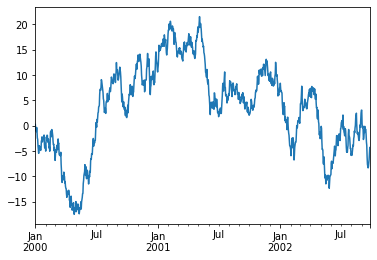

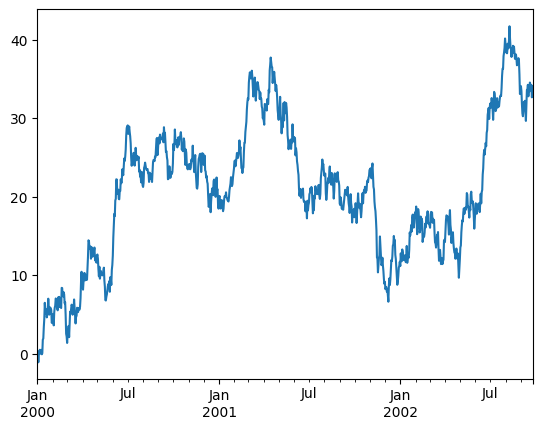

In [11]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts_cumsum = ts.cumsum()
ts_cumsum.plot()
plt.show()

# Task 2.2:  

Adapt the code above to plot 4 timeseries in the same plot, with A different colour and label for each timeseries.\
The output should look similar to this:


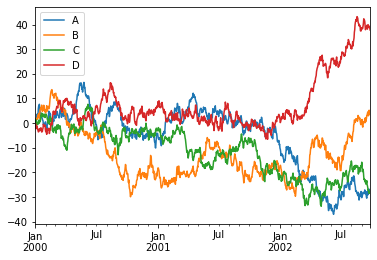

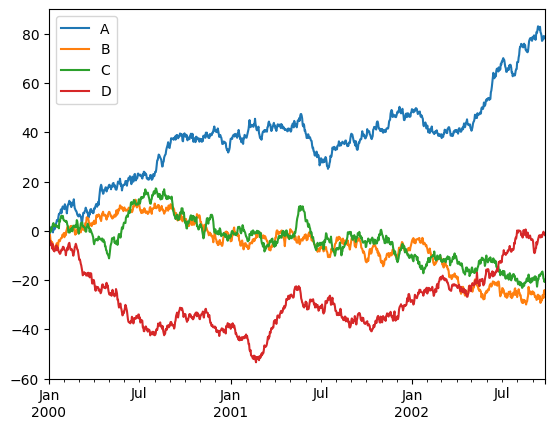

In [16]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df_cumsum = df.cumsum()
df_cumsum.plot()
plt.show()
